In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_act.columns  #CC = childcare, EC = elderly care

Index(['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24', 'TUCC5', 'TUCC5B',
       'TRTCCTOT_LN', 'TRTCC_LN', 'TRTCOC_LN', 'TUSTARTTIM', 'TUSTOPTIME',
       'TRCODEP', 'TRTIER1P', 'TRTIER2P', 'TUCC8', 'TUCUMDUR', 'TUCUMDUR24',
       'TUACTDUR', 'TR_03CC57', 'TRTO_LN', 'TRTONHH_LN', 'TRTOHH_LN',
       'TRTHH_LN', 'TRTNOHH_LN', 'TEWHERE', 'TUCC7', 'TRWBELIG', 'TRTEC_LN',
       'TUEC24', 'TUDURSTOP'],
      dtype='object')

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [5]:
#multi_resp.columns.to_list()

In [6]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [7]:
#TELFS = employment status 
#multi_merged["TELFS"].unique()

# 2003-2019 Residential

In [8]:
#only residential location from 2003-2019
residential_location = [1,3]
atus_multi_yr_res = multi_merged[multi_merged["TEWHERE"].isin(residential_location)]
atus_multi_yr_res

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
3,20030100013280,150,840,12,1203,120303,1,2,8.155463e+06,15:30:00,18:00:00,2003
4,20030100013280,5,845,11,1101,110101,1,2,8.155463e+06,18:00:00,18:05:00,2003
5,20030100013280,175,1020,12,1203,120303,1,2,8.155463e+06,18:05:00,21:00:00,2003
10,20030100013344,60,240,11,1101,110101,1,1,1.735323e+06,07:00:00,08:00:00,2003
12,20030100013344,60,360,03,0301,030101,1,1,1.735323e+06,09:00:00,10:00:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4121269,20191212192270,180,180,02,0209,020902,1,1,1.072172e+07,04:00:00,07:00:00,2019
4121271,20191212192270,75,345,12,1201,120101,1,1,1.072172e+07,08:30:00,09:45:00,2019
4121276,20191212192270,20,502,11,1101,110101,1,1,1.072172e+07,12:02:00,12:22:00,2019
4121278,20191212192270,98,690,03,0301,030103,1,1,1.072172e+07,13:52:00,15:30:00,2019


In [9]:
atus_multi_yr_res["TRTIER1P"].unique()

array(['12', '11', '03', '02', '16', '05', '14', '04', '06', '07', '50',
       '08', '18', '01', '15', '13', '09', '10'], dtype=object)

In [10]:
#atus residential year seperation by  population 
atus_2003_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res = atus_multi_yr_res[atus_multi_yr_res["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res

In [11]:
#atus year seperation for all  respondants
atus_2003 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2019")]

### All Weights from 2003-2019

In [12]:
#weight from all respondants in from 2003
atus_2003_drop = atus_2003.drop_duplicates(subset=["TUCASEID"])
all_2003_weight = atus_2003_drop["TUFNWGTP"].sum()
all_2003_weight

82231180900.71338

In [13]:
atus_2004_drop = atus_2004.drop_duplicates(subset=["TUCASEID"])
all_2004_weight = atus_2004_drop["TUFNWGTP"].sum()

atus_2005_drop = atus_2005.drop_duplicates(subset=["TUCASEID"])
all_2005_weight = atus_2005_drop["TUFNWGTP"].sum()

atus_2006_drop = atus_2006.drop_duplicates(subset=["TUCASEID"])
all_2006_weight = atus_2006_drop["TUFNWGTP"].sum()

atus_2007_drop = atus_2007.drop_duplicates(subset=["TUCASEID"])
all_2007_weight = atus_2007_drop["TUFNWGTP"].sum()

atus_2008_drop = atus_2008.drop_duplicates(subset=["TUCASEID"])
all_2008_weight = atus_2008_drop["TUFNWGTP"].sum()

atus_2009_drop = atus_2009.drop_duplicates(subset=["TUCASEID"])
all_2009_weight = atus_2009_drop["TUFNWGTP"].sum()

atus_2010_drop = atus_2010.drop_duplicates(subset=["TUCASEID"])
all_2010_weight = atus_2010_drop["TUFNWGTP"].sum()

atus_2011_drop = atus_2011.drop_duplicates(subset=["TUCASEID"])
all_2011_weight = atus_2011_drop["TUFNWGTP"].sum()

atus_2012_drop = atus_2012.drop_duplicates(subset=["TUCASEID"])
all_2012_weight = atus_2012_drop["TUFNWGTP"].sum()

atus_2013_drop = atus_2013.drop_duplicates(subset=["TUCASEID"])
all_2013_weight = atus_2013_drop["TUFNWGTP"].sum()

atus_2014_drop = atus_2014.drop_duplicates(subset=["TUCASEID"])
all_2014_weight = atus_2014_drop["TUFNWGTP"].sum()

atus_2015_drop = atus_2015.drop_duplicates(subset=["TUCASEID"])
all_2015_weight = atus_2015_drop["TUFNWGTP"].sum()

atus_2016_drop = atus_2016.drop_duplicates(subset=["TUCASEID"])
all_2016_weight = atus_2016_drop["TUFNWGTP"].sum()

atus_2017_drop = atus_2017.drop_duplicates(subset=["TUCASEID"])
all_2017_weight = atus_2017_drop["TUFNWGTP"].sum()

atus_2018_drop = atus_2018.drop_duplicates(subset=["TUCASEID"])
all_2018_weight = atus_2018_drop["TUFNWGTP"].sum()

atus_2019_drop = atus_2019.drop_duplicates(subset=["TUCASEID"])
all_2019_weight = atus_2019_drop["TUFNWGTP"].sum()

## Personal Care (Tier 01)

### 2003 Sleeping
This uses tier 2 codes that begins with 0101 for all sleeping This also inlcudes activity codes 010101=sleeping, 010102=sleeplessness, 99=sleeping nec

In [14]:
#filter to only include 2003 survey (CASEID begins witn 2003)
atus_2003 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2003")]
#atus_2003

In [15]:
#010101 is Sleeping
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e sleeping 
#all sleeping is assumed to be done at home 
sleeping_2003 = atus_2003[atus_2003["TRTIER2P"].apply(str).str.startswith("0101")]
#sleeping

In [16]:
sleep_2003 = sleeping_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#sleep

In [17]:
sleep_2003_merge = pd.merge(sleep_2003, multi_resp, on ="TUCASEID")
sleep_2003_merge = sleep_2003_merge.filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
#sleep_merge

In [18]:
sleep_2003_merge["Multiplied Weight"] = sleep_2003_merge["TUACTDUR24"] * sleep_2003_merge["TUFNWGTP"]
#sleep_2003_merge

In [19]:
sleep_2003_weight = sleep_2003_merge["Multiplied Weight"].sum()
sleep_2003_weight

42267947500623.516

In [20]:
sleeping_2003_avg_hr_per_day = sleep_2003_weight.sum() / all_2003_weight /60
sleeping_2003_avg_hr_per_day

8.566893773879235

### 2004 Sleeping

In [21]:
atus_2004 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2004")]

sleeping_2004 = atus_2004[atus_2004["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2004 = sleeping_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2004_merge = pd.merge(sleep_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2004_merge["Multiplied Weight"] = sleep_2004_merge["TUACTDUR24"] * sleep_2004_merge["TUFNWGTP"]
#sleep_2004_merge

In [22]:
sleep_2004_weight = sleep_2004_merge["Multiplied Weight"].sum()

sleeping_2004_avg_hr_per_day = sleep_2004_weight.sum() / all_2004_weight /60
sleeping_2004_avg_hr_per_day

8.546193703426919

### 2005 Sleeping

In [23]:
atus_2005 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2005")]

sleeping_2005 = atus_2005[atus_2005["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2005 = sleeping_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2005_merge = pd.merge(sleep_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2005_merge["Multiplied Weight"] = sleep_2005_merge["TUACTDUR24"] * sleep_2005_merge["TUFNWGTP"]

In [24]:
sleep_2005_weight = sleep_2005_merge["Multiplied Weight"].sum()

sleeping_2005_avg_hr_per_day = sleep_2005_weight.sum() / all_2005_weight /60
sleeping_2005_avg_hr_per_day

8.624976535467175

### 2006 Sleeping

In [25]:
atus_2006 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2006")]

sleeping_2006 = atus_2006[atus_2006["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2006 = sleeping_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2006_merge = pd.merge(sleep_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2006_merge["Multiplied Weight"] = sleep_2006_merge["TUACTDUR24"] * sleep_2006_merge["TUFNWGTP"]

In [26]:
sleep_2006_weight = sleep_2006_merge["Multiplied Weight"].sum()

sleeping_2006_avg_hr_per_day = sleep_2006_weight.sum() / all_2006_weight /60
sleeping_2006_avg_hr_per_day

8.626997380706264

### Sleeping 2007

In [27]:
atus_2007 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2007")]

sleeping_2007 = atus_2007[atus_2007["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2007 = sleeping_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2007_merge = pd.merge(sleep_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2007_merge["Multiplied Weight"] = sleep_2007_merge["TUACTDUR24"] * sleep_2007_merge["TUFNWGTP"]

In [28]:
sleep_2007_weight = sleep_2007_merge["Multiplied Weight"].sum()

sleeping_2007_avg_hr_per_day = sleep_2007_weight.sum() / all_2007_weight /60
sleeping_2007_avg_hr_per_day

8.573543784769155

### Sleeping 2008

In [29]:
atus_2008 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2008")]

sleeping_2008 = atus_2008[atus_2008["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2008 = sleeping_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2008_merge = pd.merge(sleep_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2008_merge["Multiplied Weight"] = sleep_2008_merge["TUACTDUR24"] * sleep_2008_merge["TUFNWGTP"]

In [30]:
sleep_2008_weight = sleep_2008_merge["Multiplied Weight"].sum()

sleeping_2008_avg_hr_per_day = sleep_2008_weight.sum() / all_2008_weight /60
sleeping_2008_avg_hr_per_day

8.602199723681917

### Sleeping 2009

In [31]:
atus_2009 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2009")]

sleeping_2009 = atus_2009[atus_2009["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2009 = sleeping_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2009_merge = pd.merge(sleep_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2009_merge["Multiplied Weight"] = sleep_2009_merge["TUACTDUR24"] * sleep_2009_merge["TUFNWGTP"]

In [32]:
sleep_2009_weight = sleep_2009_merge["Multiplied Weight"].sum()

sleeping_2009_avg_hr_per_day = sleep_2009_weight.sum() / all_2009_weight /60
sleeping_2009_avg_hr_per_day

8.672338161173975

### Sleeping 2010

In [33]:
atus_2010 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2010")]

sleeping_2010 = atus_2010[atus_2010["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2010 = sleeping_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2010_merge = pd.merge(sleep_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2010_merge["Multiplied Weight"] = sleep_2010_merge["TUACTDUR24"] * sleep_2010_merge["TUFNWGTP"]

In [34]:
sleep_2010_weight = sleep_2010_merge["Multiplied Weight"].sum()

sleeping_2010_avg_hr_per_day = sleep_2010_weight.sum() / all_2010_weight /60
sleeping_2010_avg_hr_per_day

8.665440903003892

### Sleeping 2011

In [35]:
atus_2011 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2011")]

sleeping_2011 = atus_2011[atus_2011["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2011 = sleeping_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2011_merge = pd.merge(sleep_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2011_merge["Multiplied Weight"] = sleep_2011_merge["TUACTDUR24"] * sleep_2011_merge["TUFNWGTP"]

In [36]:
sleep_2011_weight = sleep_2011_merge["Multiplied Weight"].sum()

sleeping_2011_avg_hr_per_day = sleep_2011_weight.sum() / all_2011_weight /60
sleeping_2011_avg_hr_per_day

8.71432663084258

### Sleeping 2012

In [37]:
atus_2012 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2012")]

sleeping_2012 = atus_2012[atus_2012["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2012 = sleeping_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2012_merge = pd.merge(sleep_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2012_merge["Multiplied Weight"] = sleep_2012_merge["TUACTDUR24"] * sleep_2012_merge["TUFNWGTP"]

In [38]:
sleep_2012_weight = sleep_2012_merge["Multiplied Weight"].sum()

sleeping_2012_avg_hr_per_day = sleep_2012_weight.sum() / all_2012_weight /60
sleeping_2012_avg_hr_per_day

8.730523413066825

### Sleeping 2013

In [39]:
atus_2013 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2013")]

sleeping_2013 = atus_2013[atus_2013["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2013 = sleeping_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2013_merge = pd.merge(sleep_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2013_merge["Multiplied Weight"] = sleep_2013_merge["TUACTDUR24"] * sleep_2013_merge["TUFNWGTP"]

In [40]:
sleep_2013_weight = sleep_2013_merge["Multiplied Weight"].sum()

sleeping_2013_avg_hr_per_day = sleep_2013_weight.sum() / all_2013_weight /60
sleeping_2013_avg_hr_per_day

8.738176540630185

### Sleeping 2014

In [41]:
atus_2014 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2014")]

sleeping_2014 = atus_2014[atus_2014["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2014 = sleeping_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2014_merge = pd.merge(sleep_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2014_merge["Multiplied Weight"] = sleep_2014_merge["TUACTDUR24"] * sleep_2014_merge["TUFNWGTP"]

In [42]:
sleep_2014_weight = sleep_2014_merge["Multiplied Weight"].sum()

sleeping_2014_avg_hr_per_day = sleep_2014_weight.sum() / all_2014_weight /60
sleeping_2014_avg_hr_per_day

8.79658052386772

### Sleeping 2015

In [43]:
atus_2015 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2015")]

sleeping_2015 = atus_2015[atus_2015["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2015 = sleeping_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2015_merge = pd.merge(sleep_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2015_merge["Multiplied Weight"] = sleep_2015_merge["TUACTDUR24"] * sleep_2015_merge["TUFNWGTP"]

In [44]:
sleep_2015_weight = sleep_2015_merge["Multiplied Weight"].sum()

sleeping_2015_avg_hr_per_day = sleep_2015_weight.sum() / all_2015_weight /60
sleeping_2015_avg_hr_per_day

8.834119693874062

### Sleeping 2016

In [45]:
atus_2016 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2016")]

sleeping_2016 = atus_2016[atus_2016["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2016 = sleeping_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2016_merge = pd.merge(sleep_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2016_merge["Multiplied Weight"] = sleep_2016_merge["TUACTDUR24"] * sleep_2016_merge["TUFNWGTP"]

In [46]:
sleep_2016_weight = sleep_2016_merge["Multiplied Weight"].sum()

sleeping_2016_avg_hr_per_day = sleep_2016_weight.sum() / all_2016_weight /60
sleeping_2016_avg_hr_per_day

8.786662771740454

### Sleeping 2017

In [47]:
atus_2017 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2017")]

sleeping_2017 = atus_2017[atus_2017["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2017 = sleeping_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2017_merge = pd.merge(sleep_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2017_merge["Multiplied Weight"] = sleep_2017_merge["TUACTDUR24"] * sleep_2017_merge["TUFNWGTP"]

In [48]:
sleep_2017_weight = sleep_2017_merge["Multiplied Weight"].sum()

sleeping_2017_avg_hr_per_day = sleep_2017_weight.sum() / all_2017_weight /60
sleeping_2017_avg_hr_per_day

8.802969246983633

### Sleeping 2018

In [49]:
atus_2018 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2018")]

sleeping_2018 = atus_2018[atus_2018["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2018 = sleeping_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2018_merge = pd.merge(sleep_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2018_merge["Multiplied Weight"] = sleep_2018_merge["TUACTDUR24"] * sleep_2018_merge["TUFNWGTP"]

In [50]:
sleep_2018_weight = sleep_2018_merge["Multiplied Weight"].sum()

sleeping_2018_avg_hr_per_day = sleep_2018_weight.sum() / all_2018_weight /60
sleeping_2018_avg_hr_per_day

8.815954973756664

### Sleeping 2019

In [51]:
atus_2019 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2019")]

sleeping_2019 = atus_2019[atus_2019["TRTIER2P"].apply(str).str.startswith("0101")]
sleep_2019 = sleeping_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2019_merge = pd.merge(sleep_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2019_merge["Multiplied Weight"] = sleep_2019_merge["TUACTDUR24"] * sleep_2019_merge["TUFNWGTP"]

In [52]:
sleep_2019_weight = sleep_2019_merge["Multiplied Weight"].sum()

sleeping_2019_avg_hr_per_day = sleep_2019_weight.sum() / all_2019_weight /60
sleeping_2019_avg_hr_per_day

8.840544891440885

### Sleeping Regression

#### 2003-2012 Sleeping Regression 

In [122]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([sleeping_2003_avg_hr_per_day, sleeping_2004_avg_hr_per_day, sleeping_2005_avg_hr_per_day, 
                                   sleeping_2006_avg_hr_per_day, sleeping_2007_avg_hr_per_day, sleeping_2008_avg_hr_per_day, 
                                   sleeping_2009_avg_hr_per_day, sleeping_2010_avg_hr_per_day, sleeping_2011_avg_hr_per_day, 
                                   sleeping_2012_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]

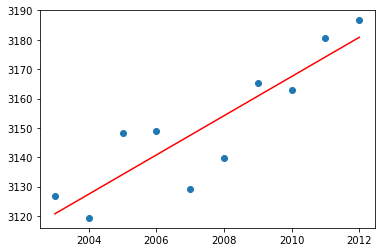

In [123]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [124]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.783169830243087

In [125]:
sleeping_res_2003_2012_slope = model.coef_
sleeping_res_2003_2012_slope

array([[6.67307901]])

#### 2003-2019 Sleeping Regression

In [126]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([sleeping_2003_avg_hr_per_day, sleeping_2004_avg_hr_per_day, sleeping_2005_avg_hr_per_day, 
                                   sleeping_2006_avg_hr_per_day, sleeping_2007_avg_hr_per_day, sleeping_2008_avg_hr_per_day, 
                                   sleeping_2009_avg_hr_per_day, sleeping_2010_avg_hr_per_day, sleeping_2011_avg_hr_per_day, 
                                   sleeping_2012_avg_hr_per_day, sleeping_2013_avg_hr_per_day, sleeping_2014_avg_hr_per_day, 
                                   sleeping_2015_avg_hr_per_day, sleeping_2016_avg_hr_per_day, sleeping_2017_avg_hr_per_day, 
                                   sleeping_2018_avg_hr_per_day, sleeping_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

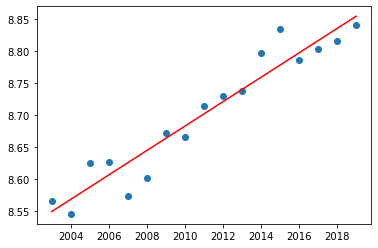

In [58]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [59]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.9182486058374336

In [60]:
sleeping_res_2003_2019_slope = model.coef_
sleeping_res_2003_2019_slope

array([[0.01903438]])

In [127]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [sleeping_2003_avg_hr_per_day, sleeping_2004_avg_hr_per_day, sleeping_2005_avg_hr_per_day, 
                                   sleeping_2006_avg_hr_per_day, sleeping_2007_avg_hr_per_day, sleeping_2008_avg_hr_per_day, 
                                   sleeping_2009_avg_hr_per_day, sleeping_2010_avg_hr_per_day, sleeping_2011_avg_hr_per_day, 
                                   sleeping_2012_avg_hr_per_day, sleeping_2013_avg_hr_per_day, sleeping_2014_avg_hr_per_day, 
                                   sleeping_2015_avg_hr_per_day, sleeping_2016_avg_hr_per_day, sleeping_2017_avg_hr_per_day, 
                                   sleeping_2018_avg_hr_per_day, sleeping_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,8.566894
1,2004,8.546194
2,2005,8.624977
3,2006,8.626997
4,2007,8.573544
5,2008,8.602200
6,2009,8.672338
7,2010,8.665441
8,2011,8.714327
9,2012,8.730523


### 2003 Grooming 
This uses tier 2 codes that begins with 0102 for all grooming. This also inlcudes activity codes 010201=Washing, dressing and grooming oneself, 010299 = grooming nec

In [61]:
#0102is Grooming
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e grooming, grooming 
#all grooming is assumed to be done at home 

#2003 Grooming
grooming_2003 = atus_2003[atus_2003["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2003 = grooming_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2003_merge = pd.merge(groom_2003, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2003_merge["Multiplied Weight"] = groom_2003_merge["TUACTDUR24"] * groom_2003_merge["TUFNWGTP"]
groom_2003_weight = groom_2003_merge["Multiplied Weight"].sum()
grooming_2003_avg_hr_per_day = groom_2003_weight.sum() / all_2003_weight /60

# 2004 Grooming
grooming_2004 = atus_2004[atus_2004["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2004 = grooming_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

groom_2004_merge = pd.merge(groom_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
groom_2004_merge["Multiplied Weight"] = groom_2004_merge["TUACTDUR24"] * groom_2004_merge["TUFNWGTP"]
#groom_2004_merge

groom_2004_weight = groom_2004_merge["Multiplied Weight"].sum()
grooming_2004_avg_hr_per_day = groom_2004_weight.sum() / all_2004_weight /60
grooming_2004_avg_hr_per_day

# 2005 grooming
grooming_2005 = atus_2005[atus_2005["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2005 = grooming_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2005_merge = pd.merge(groom_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2005_merge["Multiplied Weight"] = groom_2005_merge["TUACTDUR24"] * groom_2005_merge["TUFNWGTP"]
groom_2005_weight = groom_2005_merge["Multiplied Weight"].sum()
grooming_2005_avg_hr_per_day = groom_2005_weight.sum() / all_2005_weight /60

# 2006 grooming
grooming_2006 = atus_2006[atus_2006["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2006 = grooming_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2006_merge = pd.merge(groom_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2006_merge["Multiplied Weight"] = groom_2006_merge["TUACTDUR24"] * groom_2006_merge["TUFNWGTP"]
groom_2006_weight = groom_2006_merge["Multiplied Weight"].sum()
grooming_2006_avg_hr_per_day = groom_2006_weight.sum() / all_2006_weight /60

# grooming 2007
grooming_2007 = atus_2007[atus_2007["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2007 = grooming_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2007_merge = pd.merge(groom_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2007_merge["Multiplied Weight"] = groom_2007_merge["TUACTDUR24"] * groom_2007_merge["TUFNWGTP"]
groom_2007_weight = groom_2007_merge["Multiplied Weight"].sum()
grooming_2007_avg_hr_per_day = groom_2007_weight.sum() / all_2007_weight /60

# grooming 2008
grooming_2008 = atus_2008[atus_2008["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2008 = grooming_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2008_merge = pd.merge(groom_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2008_merge["Multiplied Weight"] = groom_2008_merge["TUACTDUR24"] * groom_2008_merge["TUFNWGTP"]
groom_2008_weight = groom_2008_merge["Multiplied Weight"].sum()
grooming_2008_avg_hr_per_day = groom_2008_weight.sum() / all_2008_weight /60

# grooming 2009
grooming_2009 = atus_2009[atus_2009["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2009 = grooming_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2009_merge = pd.merge(groom_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2009_merge["Multiplied Weight"] = groom_2009_merge["TUACTDUR24"] * groom_2009_merge["TUFNWGTP"]
groom_2009_weight = groom_2009_merge["Multiplied Weight"].sum()
grooming_2009_avg_hr_per_day = groom_2009_weight.sum() / all_2009_weight /60

# grooming 2010
grooming_2010 = atus_2010[atus_2010["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2010 = grooming_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2010_merge = pd.merge(groom_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2010_merge["Multiplied Weight"] = groom_2010_merge["TUACTDUR24"] * groom_2010_merge["TUFNWGTP"]
groom_2010_weight = groom_2010_merge["Multiplied Weight"].sum()
grooming_2010_avg_hr_per_day = groom_2010_weight.sum() / all_2010_weight /60

# grooming 2011
grooming_2011 = atus_2011[atus_2011["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2011 = grooming_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2011_merge = pd.merge(groom_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2011_merge["Multiplied Weight"] = groom_2011_merge["TUACTDUR24"] * groom_2011_merge["TUFNWGTP"]
groom_2011_weight = groom_2011_merge["Multiplied Weight"].sum()
grooming_2011_avg_hr_per_day = groom_2011_weight.sum() / all_2011_weight /60

# grooming 2012
grooming_2012 = atus_2012[atus_2012["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2012 = grooming_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2012_merge = pd.merge(groom_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2012_merge["Multiplied Weight"] = groom_2012_merge["TUACTDUR24"] * groom_2012_merge["TUFNWGTP"]
groom_2012_weight = groom_2012_merge["Multiplied Weight"].sum()
grooming_2012_avg_hr_per_day = groom_2012_weight.sum() / all_2012_weight /60

# grooming 2013
grooming_2013 = atus_2013[atus_2013["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2013 = grooming_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2013_merge = pd.merge(groom_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2013_merge["Multiplied Weight"] = groom_2013_merge["TUACTDUR24"] * groom_2013_merge["TUFNWGTP"]
groom_2013_weight = groom_2013_merge["Multiplied Weight"].sum()
grooming_2013_avg_hr_per_day = groom_2013_weight.sum() / all_2013_weight /60

# grooming 2014
grooming_2014 = atus_2014[atus_2014["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2014 = grooming_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2014_merge = pd.merge(groom_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2014_merge["Multiplied Weight"] = groom_2014_merge["TUACTDUR24"] * groom_2014_merge["TUFNWGTP"]
groom_2014_weight = groom_2014_merge["Multiplied Weight"].sum()
grooming_2014_avg_hr_per_day = groom_2014_weight.sum() / all_2014_weight /60

# grooming 2015
grooming_2015 = atus_2015[atus_2015["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2015 = grooming_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2015_merge = pd.merge(groom_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2015_merge["Multiplied Weight"] = groom_2015_merge["TUACTDUR24"] * groom_2015_merge["TUFNWGTP"]
groom_2015_weight = groom_2015_merge["Multiplied Weight"].sum()
grooming_2015_avg_hr_per_day = groom_2015_weight.sum() / all_2015_weight /60

# grooming 2016
grooming_2016 = atus_2016[atus_2016["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2016 = grooming_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2016_merge = pd.merge(groom_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2016_merge["Multiplied Weight"] = groom_2016_merge["TUACTDUR24"] * groom_2016_merge["TUFNWGTP"]
groom_2016_weight = groom_2016_merge["Multiplied Weight"].sum()
grooming_2016_avg_hr_per_day = groom_2016_weight.sum() / all_2016_weight /60

# grooming 2017
grooming_2017 = atus_2017[atus_2017["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2017 = grooming_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2017_merge = pd.merge(groom_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2017_merge["Multiplied Weight"] = groom_2017_merge["TUACTDUR24"] * groom_2017_merge["TUFNWGTP"]
groom_2017_weight = groom_2017_merge["Multiplied Weight"].sum()
grooming_2017_avg_hr_per_day = groom_2017_weight.sum() / all_2017_weight /60

# grooming 2018
grooming_2018 = atus_2018[atus_2018["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2018 = grooming_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2018_merge = pd.merge(groom_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2018_merge["Multiplied Weight"] = groom_2018_merge["TUACTDUR24"] * groom_2018_merge["TUFNWGTP"]
groom_2018_weight = groom_2018_merge["Multiplied Weight"].sum()
grooming_2018_avg_hr_per_day = groom_2018_weight.sum() / all_2018_weight /60

# grooming 2019
grooming_2019 = atus_2019[atus_2019["TRTIER2P"].apply(str).str.startswith("0102")]
groom_2019 = grooming_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
groom_2019_merge = pd.merge(groom_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

groom_2019_merge["Multiplied Weight"] = groom_2019_merge["TUACTDUR24"] * groom_2019_merge["TUFNWGTP"]
groom_2019_weight = groom_2019_merge["Multiplied Weight"].sum()
grooming_2019_avg_hr_per_day = groom_2019_weight.sum() / all_2019_weight /60

### Grooming Regression
2003-2019 Grooming Regression

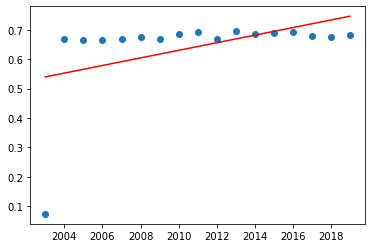

In [120]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([grooming_2003_avg_hr_per_day, grooming_2004_avg_hr_per_day, grooming_2005_avg_hr_per_day, 
                                   grooming_2006_avg_hr_per_day, grooming_2007_avg_hr_per_day, grooming_2008_avg_hr_per_day, 
                                   grooming_2009_avg_hr_per_day, grooming_2010_avg_hr_per_day, grooming_2011_avg_hr_per_day, 
                                   grooming_2012_avg_hr_per_day, grooming_2013_avg_hr_per_day, grooming_2014_avg_hr_per_day, 
                                   grooming_2015_avg_hr_per_day, grooming_2016_avg_hr_per_day, grooming_2017_avg_hr_per_day, 
                                   grooming_2018_avg_hr_per_day, grooming_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [63]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3587742332313927

In [64]:
grooming_res_2003_2019_slope = model.coef_
grooming_res_2003_2019_slope

array([[0.00122692]])

In [119]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [grooming_2003_avg_hr_per_day, grooming_2004_avg_hr_per_day, grooming_2005_avg_hr_per_day,
                          grooming_2006_avg_hr_per_day, grooming_2007_avg_hr_per_day, grooming_2008_avg_hr_per_day, 
                          grooming_2009_avg_hr_per_day, grooming_2010_avg_hr_per_day, grooming_2011_avg_hr_per_day, 
                          grooming_2012_avg_hr_per_day, grooming_2013_avg_hr_per_day, grooming_2014_avg_hr_per_day, 
                          grooming_2015_avg_hr_per_day, grooming_2016_avg_hr_per_day, grooming_2017_avg_hr_per_day, 
                          grooming_2018_avg_hr_per_day, grooming_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,0.073778
1,2004,0.667611
2,2005,0.666223
3,2006,0.666572
4,2007,0.668203
5,2008,0.673489
6,2009,0.669559
7,2010,0.685323
8,2011,0.691738
9,2012,0.667787


### Health-related Self Care (0103)
010301 = Health-related self care, 010399 = Self care, n.e.c.*

In [129]:
#2003 Health-related Self Care
health_care_2003 = atus_2003_res[atus_2003_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2003 = health_care_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2003_merge = pd.merge(health_2003, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2003_merge["Multiplied Weight"] = health_2003_merge["TUACTDUR24"] * health_2003_merge["TUFNWGTP"]
health_2003_weight = health_2003_merge["Multiplied Weight"].sum()
health_care_res_2003_avg_hr_per_day = health_2003_weight.sum() / all_2003_weight /60


#2004 Health-related Self Care
health_care_2004 = atus_2004_res[atus_2004_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2004 = health_care_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2004_merge = pd.merge(health_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2004_merge["Multiplied Weight"] = health_2004_merge["TUACTDUR24"] * health_2004_merge["TUFNWGTP"]
health_2004_weight = health_2004_merge["Multiplied Weight"].sum()
health_care_res_2004_avg_hr_per_day = health_2004_weight.sum() / all_2004_weight /60

#2005 Health-related Self Care
health_care_2005 = atus_2005_res[atus_2005_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2005 = health_care_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2005_merge = pd.merge(health_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2005_merge["Multiplied Weight"] = health_2005_merge["TUACTDUR24"] * health_2005_merge["TUFNWGTP"]
health_2005_weight = health_2005_merge["Multiplied Weight"].sum()
health_care_res_2005_avg_hr_per_day = health_2005_weight.sum() / all_2005_weight /60

#2006 Health-related Self Care
health_care_2006 = atus_2006_res[atus_2006_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2006 = health_care_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2006_merge = pd.merge(health_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2006_merge["Multiplied Weight"] = health_2006_merge["TUACTDUR24"] * health_2006_merge["TUFNWGTP"]
health_2006_weight = health_2006_merge["Multiplied Weight"].sum()
health_care_res_2006_avg_hr_per_day = health_2006_weight.sum() / all_2006_weight /60

#2007 Health-related Self Care
health_care_2007 = atus_2007_res[atus_2007_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2007 = health_care_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2007_merge = pd.merge(health_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2007_merge["Multiplied Weight"] = health_2007_merge["TUACTDUR24"] * health_2007_merge["TUFNWGTP"]
health_2007_weight = health_2007_merge["Multiplied Weight"].sum()
health_care_res_2007_avg_hr_per_day = health_2007_weight.sum() / all_2007_weight /60

#2008 Health-related Self Care
health_care_2008 = atus_2008_res[atus_2008_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2008 = health_care_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2008_merge = pd.merge(health_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2008_merge["Multiplied Weight"] = health_2008_merge["TUACTDUR24"] * health_2008_merge["TUFNWGTP"]
health_2008_weight = health_2008_merge["Multiplied Weight"].sum()
health_care_res_2008_avg_hr_per_day = health_2008_weight.sum() / all_2008_weight /60

#2009 Health-related Self Care
health_care_2009 = atus_2009_res[atus_2009_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2009 = health_care_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2009_merge = pd.merge(health_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2009_merge["Multiplied Weight"] = health_2009_merge["TUACTDUR24"] * health_2009_merge["TUFNWGTP"]
health_2009_weight = health_2009_merge["Multiplied Weight"].sum()
health_care_res_2009_avg_hr_per_day = health_2009_weight.sum() / all_2009_weight /60

#2010 Health-related Self Care
health_care_2010 = atus_2010_res[atus_2010_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2010 = health_care_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2010_merge = pd.merge(health_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2010_merge["Multiplied Weight"] = health_2010_merge["TUACTDUR24"] * health_2010_merge["TUFNWGTP"]
health_2010_weight = health_2010_merge["Multiplied Weight"].sum()
health_care_res_2010_avg_hr_per_day = health_2010_weight.sum() / all_2010_weight /60

#2011 Health-related Self Care
health_care_2011 = atus_2011_res[atus_2011_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2011 = health_care_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2011_merge = pd.merge(health_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2011_merge["Multiplied Weight"] = health_2011_merge["TUACTDUR24"] * health_2011_merge["TUFNWGTP"]
health_2011_weight = health_2011_merge["Multiplied Weight"].sum()
health_care_res_2011_avg_hr_per_day = health_2011_weight.sum() / all_2011_weight /60

#2012 Health-related Self Care
health_care_2012 = atus_2012_res[atus_2012_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2012 = health_care_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2012_merge = pd.merge(health_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2012_merge["Multiplied Weight"] = health_2012_merge["TUACTDUR24"] * health_2012_merge["TUFNWGTP"]
health_2012_weight = health_2012_merge["Multiplied Weight"].sum()
health_care_res_2012_avg_hr_per_day = health_2012_weight.sum() / all_2012_weight /60

#2013 Health-related Self Care
health_care_2013 = atus_2013_res[atus_2013_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2013 = health_care_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2013_merge = pd.merge(health_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2013_merge["Multiplied Weight"] = health_2013_merge["TUACTDUR24"] * health_2013_merge["TUFNWGTP"]
health_2013_weight = health_2013_merge["Multiplied Weight"].sum()
health_care_res_2013_avg_hr_per_day = health_2013_weight.sum() / all_2013_weight /60

#2014 Health-related Self Care
health_care_2014 = atus_2014_res[atus_2014_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2014 = health_care_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2014_merge = pd.merge(health_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2014_merge["Multiplied Weight"] = health_2014_merge["TUACTDUR24"] * health_2014_merge["TUFNWGTP"]
health_2014_weight = health_2014_merge["Multiplied Weight"].sum()
health_care_res_2014_avg_hr_per_day = health_2014_weight.sum() / all_2014_weight /60

#2015 Health-related Self Care
health_care_2015 = atus_2015_res[atus_2015_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2015 = health_care_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2015_merge = pd.merge(health_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2015_merge["Multiplied Weight"] = health_2015_merge["TUACTDUR24"] * health_2015_merge["TUFNWGTP"]
health_2015_weight = health_2015_merge["Multiplied Weight"].sum()
health_care_res_2015_avg_hr_per_day = health_2015_weight.sum() / all_2015_weight /60

#2016 Health-related Self Care
health_care_2016 = atus_2016_res[atus_2016_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2016 = health_care_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2016_merge = pd.merge(health_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2016_merge["Multiplied Weight"] = health_2016_merge["TUACTDUR24"] * health_2016_merge["TUFNWGTP"]
health_2016_weight = health_2016_merge["Multiplied Weight"].sum()
health_care_res_2016_avg_hr_per_day = health_2016_weight.sum() / all_2016_weight /60

#2017 Health-related Self Care
health_care_2017 = atus_2017_res[atus_2017_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2017 = health_care_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2017_merge = pd.merge(health_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2017_merge["Multiplied Weight"] = health_2017_merge["TUACTDUR24"] * health_2017_merge["TUFNWGTP"]
health_2017_weight = health_2017_merge["Multiplied Weight"].sum()
health_care_res_2017_avg_hr_per_day = health_2017_weight.sum() / all_2017_weight /60

#2018 Health-related Self Care
health_care_2018 = atus_2018_res[atus_2018_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2018 = health_care_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2018_merge = pd.merge(health_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2018_merge["Multiplied Weight"] = health_2018_merge["TUACTDUR24"] * health_2018_merge["TUFNWGTP"]
health_2018_weight = health_2018_merge["Multiplied Weight"].sum()
health_care_res_2018_avg_hr_per_day = health_2018_weight.sum() / all_2018_weight /60

#2019 Health-related Self Care
health_care_2019 = atus_2019_res[atus_2019_res["TRCODEP"].apply(str).str.startswith("0103")]
health_2019 = health_care_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
health_2019_merge = pd.merge(health_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

health_2019_merge["Multiplied Weight"] = health_2019_merge["TUACTDUR24"] * health_2019_merge["TUFNWGTP"]
health_2019_weight = health_2019_merge["Multiplied Weight"].sum()
health_care_res_2019_avg_hr_per_day = health_2019_weight.sum() / all_2019_weight /60

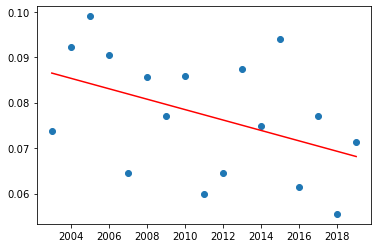

In [130]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([health_care_res_2003_avg_hr_per_day, health_care_res_2004_avg_hr_per_day, 
                                   health_care_res_2005_avg_hr_per_day, health_care_res_2006_avg_hr_per_day, 
                                   health_care_res_2007_avg_hr_per_day, health_care_res_2008_avg_hr_per_day, 
                                   health_care_res_2009_avg_hr_per_day, health_care_res_2010_avg_hr_per_day, 
                                   health_care_res_2011_avg_hr_per_day, health_care_res_2012_avg_hr_per_day, 
                                   health_care_res_2013_avg_hr_per_day, health_care_res_2014_avg_hr_per_day, 
                                   health_care_res_2015_avg_hr_per_day, health_care_res_2016_avg_hr_per_day, 
                                   health_care_res_2017_avg_hr_per_day, health_care_res_2018_avg_hr_per_day, 
                                   health_care_res_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [131]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.19219188752907623

In [132]:
health_care_res_2003_2019_slope = model.coef_
health_care_res_2003_2019_slope

array([[-0.0011476]])

In [134]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [health_care_2003_avg_hr_per_day, health_care_2004_avg_hr_per_day, health_care_2005_avg_hr_per_day, 
                          health_care_2006_avg_hr_per_day, health_care_2007_avg_hr_per_day, health_care_2008_avg_hr_per_day, 
                          health_care_2009_avg_hr_per_day, health_care_2010_avg_hr_per_day, health_care_2011_avg_hr_per_day, 
                          health_care_2012_avg_hr_per_day, health_care_2013_avg_hr_per_day, health_care_2014_avg_hr_per_day, 
                          health_care_2015_avg_hr_per_day, health_care_2016_avg_hr_per_day, health_care_2017_avg_hr_per_day, 
                          health_care_2018_avg_hr_per_day, health_care_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,0.073778
1,2004,0.092285
2,2005,0.099012
3,2006,0.090424
4,2007,0.064534
5,2008,0.085551
6,2009,0.076980
7,2010,0.085904
8,2011,0.059922
9,2012,0.064604


### Personal Activities (0104)
010401 = Personal/Private activities, 010499 = Self care, n.e.c.*

In [151]:
#0104 Personal Activities
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e personal_act, personal_act 
#all personal_act is assumed to be done at home 

#2003 Personal Activities
personal_act_2003 = atus_2003[atus_2003["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2003 = personal_act_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2003_merge = pd.merge(personal_2003, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2003_merge["Multiplied Weight"] = personal_2003_merge["TUACTDUR24"] * personal_2003_merge["TUFNWGTP"]
personal_2003_weight = personal_2003_merge["Multiplied Weight"].sum()
personal_act_2003_avg_hr_per_day = personal_2003_weight.sum() / all_2003_weight /60

# 2004 Personal Activities
personal_act_2004 = atus_2004[atus_2004["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2004 = personal_act_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

personal_2004_merge = pd.merge(personal_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
personal_2004_merge["Multiplied Weight"] = personal_2004_merge["TUACTDUR24"] * personal_2004_merge["TUFNWGTP"]
#personal_2004_merge

personal_2004_weight = personal_2004_merge["Multiplied Weight"].sum()
personal_act_2004_avg_hr_per_day = personal_2004_weight.sum() / all_2004_weight /60
personal_act_2004_avg_hr_per_day

# 2005 Personal Activities
personal_act_2005 = atus_2005[atus_2005["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2005 = personal_act_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2005_merge = pd.merge(personal_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2005_merge["Multiplied Weight"] = personal_2005_merge["TUACTDUR24"] * personal_2005_merge["TUFNWGTP"]
personal_2005_weight = personal_2005_merge["Multiplied Weight"].sum()
personal_act_2005_avg_hr_per_day = personal_2005_weight.sum() / all_2005_weight /60

# 2006 Personal Activities
personal_act_2006 = atus_2006[atus_2006["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2006 = personal_act_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2006_merge = pd.merge(personal_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2006_merge["Multiplied Weight"] = personal_2006_merge["TUACTDUR24"] * personal_2006_merge["TUFNWGTP"]
personal_2006_weight = personal_2006_merge["Multiplied Weight"].sum()
personal_act_2006_avg_hr_per_day = personal_2006_weight.sum() / all_2006_weight /60

# 2007 Personal Activities
personal_act_2007 = atus_2007[atus_2007["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2007 = personal_act_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2007_merge = pd.merge(personal_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2007_merge["Multiplied Weight"] = personal_2007_merge["TUACTDUR24"] * personal_2007_merge["TUFNWGTP"]
personal_2007_weight = personal_2007_merge["Multiplied Weight"].sum()
personal_act_2007_avg_hr_per_day = personal_2007_weight.sum() / all_2007_weight /60

# 2008 Personal Activities
personal_act_2008 = atus_2008[atus_2008["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2008 = personal_act_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2008_merge = pd.merge(personal_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2008_merge["Multiplied Weight"] = personal_2008_merge["TUACTDUR24"] * personal_2008_merge["TUFNWGTP"]
personal_2008_weight = personal_2008_merge["Multiplied Weight"].sum()
personal_act_2008_avg_hr_per_day = personal_2008_weight.sum() / all_2008_weight /60

# 2009 Personal Activities
personal_act_2009 = atus_2009[atus_2009["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2009 = personal_act_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2009_merge = pd.merge(personal_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2009_merge["Multiplied Weight"] = personal_2009_merge["TUACTDUR24"] * personal_2009_merge["TUFNWGTP"]
personal_2009_weight = personal_2009_merge["Multiplied Weight"].sum()
personal_act_2009_avg_hr_per_day = personal_2009_weight.sum() / all_2009_weight /60

# 2010 Personal Activities
personal_act_2010 = atus_2010[atus_2010["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2010 = personal_act_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2010_merge = pd.merge(personal_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2010_merge["Multiplied Weight"] = personal_2010_merge["TUACTDUR24"] * personal_2010_merge["TUFNWGTP"]
personal_2010_weight = personal_2010_merge["Multiplied Weight"].sum()
personal_act_2010_avg_hr_per_day = personal_2010_weight.sum() / all_2010_weight /60

# 2011 Personal Activities
personal_act_2011 = atus_2011[atus_2011["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2011 = personal_act_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2011_merge = pd.merge(personal_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2011_merge["Multiplied Weight"] = personal_2011_merge["TUACTDUR24"] * personal_2011_merge["TUFNWGTP"]
personal_2011_weight = personal_2011_merge["Multiplied Weight"].sum()
personal_act_2011_avg_hr_per_day = personal_2011_weight.sum() / all_2011_weight /60

# 2012 Personal Activities
personal_act_2012 = atus_2012[atus_2012["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2012 = personal_act_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2012_merge = pd.merge(personal_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2012_merge["Multiplied Weight"] = personal_2012_merge["TUACTDUR24"] * personal_2012_merge["TUFNWGTP"]
personal_2012_weight = personal_2012_merge["Multiplied Weight"].sum()
personal_act_2012_avg_hr_per_day = personal_2012_weight.sum() / all_2012_weight /60

# 2013 Personal Activities
personal_act_2013 = atus_2013[atus_2013["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2013 = personal_act_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2013_merge = pd.merge(personal_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2013_merge["Multiplied Weight"] = personal_2013_merge["TUACTDUR24"] * personal_2013_merge["TUFNWGTP"]
personal_2013_weight = personal_2013_merge["Multiplied Weight"].sum()
personal_act_2013_avg_hr_per_day = personal_2013_weight.sum() / all_2013_weight /60

# 2014 Personal Activities
personal_act_2014 = atus_2014[atus_2014["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2014 = personal_act_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2014_merge = pd.merge(personal_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2014_merge["Multiplied Weight"] = personal_2014_merge["TUACTDUR24"] * personal_2014_merge["TUFNWGTP"]
personal_2014_weight = personal_2014_merge["Multiplied Weight"].sum()
personal_act_2014_avg_hr_per_day = personal_2014_weight.sum() / all_2014_weight /60

# 2015 Personal Activities
personal_act_2015 = atus_2015[atus_2015["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2015 = personal_act_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2015_merge = pd.merge(personal_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2015_merge["Multiplied Weight"] = personal_2015_merge["TUACTDUR24"] * personal_2015_merge["TUFNWGTP"]
personal_2015_weight = personal_2015_merge["Multiplied Weight"].sum()
personal_act_2015_avg_hr_per_day = personal_2015_weight.sum() / all_2015_weight /60

# 2016 Personal Activities
personal_act_2016 = atus_2016[atus_2016["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2016 = personal_act_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2016_merge = pd.merge(personal_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2016_merge["Multiplied Weight"] = personal_2016_merge["TUACTDUR24"] * personal_2016_merge["TUFNWGTP"]
personal_2016_weight = personal_2016_merge["Multiplied Weight"].sum()
personal_act_2016_avg_hr_per_day = personal_2016_weight.sum() / all_2016_weight /60

# 2017 Personal Activities
personal_act_2017 = atus_2017[atus_2017["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2017 = personal_act_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2017_merge = pd.merge(personal_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2017_merge["Multiplied Weight"] = personal_2017_merge["TUACTDUR24"] * personal_2017_merge["TUFNWGTP"]
personal_2017_weight = personal_2017_merge["Multiplied Weight"].sum()
personal_act_2017_avg_hr_per_day = personal_2017_weight.sum() / all_2017_weight /60

# 2018 Personal Activities
personal_act_2018 = atus_2018[atus_2018["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2018 = personal_act_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2018_merge = pd.merge(personal_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2018_merge["Multiplied Weight"] = personal_2018_merge["TUACTDUR24"] * personal_2018_merge["TUFNWGTP"]
personal_2018_weight = personal_2018_merge["Multiplied Weight"].sum()
personal_act_2018_avg_hr_per_day = personal_2018_weight.sum() / all_2018_weight /60

# 2019 Personal Activities
personal_act_2019 = atus_2019[atus_2019["TRTIER2P"].apply(str).str.startswith("0104")]
personal_2019 = personal_act_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
personal_2019_merge = pd.merge(personal_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

personal_2019_merge["Multiplied Weight"] = personal_2019_merge["TUACTDUR24"] * personal_2019_merge["TUFNWGTP"]
personal_2019_weight = personal_2019_merge["Multiplied Weight"].sum()
personal_act_2019_avg_hr_per_day = personal_2019_weight.sum() / all_2019_weight /60

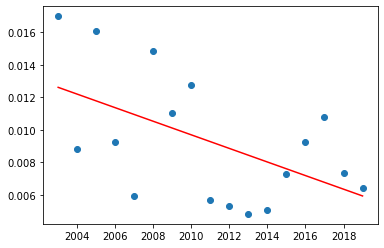

In [152]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([personal_act_2003_avg_hr_per_day, personal_act_2004_avg_hr_per_day, personal_act_2005_avg_hr_per_day, 
                                   personal_act_2006_avg_hr_per_day, personal_act_2007_avg_hr_per_day, personal_act_2008_avg_hr_per_day, 
                                   personal_act_2009_avg_hr_per_day, personal_act_2010_avg_hr_per_day, personal_act_2011_avg_hr_per_day, 
                                   personal_act_2012_avg_hr_per_day, personal_act_2013_avg_hr_per_day, personal_act_2014_avg_hr_per_day, 
                                   personal_act_2015_avg_hr_per_day, personal_act_2016_avg_hr_per_day, personal_act_2017_avg_hr_per_day, 
                                   personal_act_2018_avg_hr_per_day, personal_act_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [153]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.2871189855610582

In [154]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [personal_act_2003_avg_hr_per_day, personal_act_2004_avg_hr_per_day, personal_act_2005_avg_hr_per_day,
                          personal_act_2006_avg_hr_per_day, personal_act_2007_avg_hr_per_day, personal_act_2008_avg_hr_per_day, 
                          personal_act_2009_avg_hr_per_day, personal_act_2010_avg_hr_per_day, personal_act_2011_avg_hr_per_day, 
                          personal_act_2012_avg_hr_per_day, personal_act_2013_avg_hr_per_day, personal_act_2014_avg_hr_per_day, 
                          personal_act_2015_avg_hr_per_day, personal_act_2016_avg_hr_per_day, personal_act_2017_avg_hr_per_day, 
                          personal_act_2018_avg_hr_per_day, personal_act_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,0.016975
1,2004,0.008817
2,2005,0.016083
3,2006,0.009237
4,2007,0.005943
5,2008,0.014821
6,2009,0.011051
7,2010,0.012727
8,2011,0.005660
9,2012,0.005330


### Personal Care Emergencies
010501 = Personal Emergencies, 010599 = Personal care emergencies, n.e.c.*

In [157]:
#0105 Personal Care Emergencies
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e pers_care_emergency, pers_care_emergency 
#all pers_care_emergency is assumed to be done at home 

#2003 Personal Care Emergencies
pers_care_emergency_2003 = atus_2003[atus_2003["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2003 = pers_care_emergency_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2003_merge = pd.merge(emergency_2003, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2003_merge["Multiplied Weight"] = emergency_2003_merge["TUACTDUR24"] * emergency_2003_merge["TUFNWGTP"]
emergency_2003_weight = emergency_2003_merge["Multiplied Weight"].sum()
pers_care_emergency_2003_avg_hr_per_day = emergency_2003_weight.sum() / all_2003_weight /60

# 2004 Personal Care Emergencies
pers_care_emergency_2004 = atus_2004[atus_2004["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2004 = pers_care_emergency_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

emergency_2004_merge = pd.merge(emergency_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
emergency_2004_merge["Multiplied Weight"] = emergency_2004_merge["TUACTDUR24"] * emergency_2004_merge["TUFNWGTP"]
#emergency_2004_merge

emergency_2004_weight = emergency_2004_merge["Multiplied Weight"].sum()
pers_care_emergency_2004_avg_hr_per_day = emergency_2004_weight.sum() / all_2004_weight /60
pers_care_emergency_2004_avg_hr_per_day

# 2005 Personal Care Emergencies
pers_care_emergency_2005 = atus_2005[atus_2005["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2005 = pers_care_emergency_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2005_merge = pd.merge(emergency_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2005_merge["Multiplied Weight"] = emergency_2005_merge["TUACTDUR24"] * emergency_2005_merge["TUFNWGTP"]
emergency_2005_weight = emergency_2005_merge["Multiplied Weight"].sum()
pers_care_emergency_2005_avg_hr_per_day = emergency_2005_weight.sum() / all_2005_weight /60

# 2006 Personal Care Emergencies
pers_care_emergency_2006 = atus_2006[atus_2006["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2006 = pers_care_emergency_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2006_merge = pd.merge(emergency_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2006_merge["Multiplied Weight"] = emergency_2006_merge["TUACTDUR24"] * emergency_2006_merge["TUFNWGTP"]
emergency_2006_weight = emergency_2006_merge["Multiplied Weight"].sum()
pers_care_emergency_2006_avg_hr_per_day = emergency_2006_weight.sum() / all_2006_weight /60

# 2007 Personal Care Emergencies
pers_care_emergency_2007 = atus_2007[atus_2007["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2007 = pers_care_emergency_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2007_merge = pd.merge(emergency_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2007_merge["Multiplied Weight"] = emergency_2007_merge["TUACTDUR24"] * emergency_2007_merge["TUFNWGTP"]
emergency_2007_weight = emergency_2007_merge["Multiplied Weight"].sum()
pers_care_emergency_2007_avg_hr_per_day = emergency_2007_weight.sum() / all_2007_weight /60

# 2008 Personal Care Emergencies
pers_care_emergency_2008 = atus_2008[atus_2008["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2008 = pers_care_emergency_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2008_merge = pd.merge(emergency_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2008_merge["Multiplied Weight"] = emergency_2008_merge["TUACTDUR24"] * emergency_2008_merge["TUFNWGTP"]
emergency_2008_weight = emergency_2008_merge["Multiplied Weight"].sum()
pers_care_emergency_2008_avg_hr_per_day = emergency_2008_weight.sum() / all_2008_weight /60

# 2009 Personal Care Emergencies
pers_care_emergency_2009 = atus_2009[atus_2009["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2009 = pers_care_emergency_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2009_merge = pd.merge(emergency_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2009_merge["Multiplied Weight"] = emergency_2009_merge["TUACTDUR24"] * emergency_2009_merge["TUFNWGTP"]
emergency_2009_weight = emergency_2009_merge["Multiplied Weight"].sum()
pers_care_emergency_2009_avg_hr_per_day = emergency_2009_weight.sum() / all_2009_weight /60

# 2010 Personal Care Emergencies
pers_care_emergency_2010 = atus_2010[atus_2010["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2010 = pers_care_emergency_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2010_merge = pd.merge(emergency_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2010_merge["Multiplied Weight"] = emergency_2010_merge["TUACTDUR24"] * emergency_2010_merge["TUFNWGTP"]
emergency_2010_weight = emergency_2010_merge["Multiplied Weight"].sum()
pers_care_emergency_2010_avg_hr_per_day = emergency_2010_weight.sum() / all_2010_weight /60

# 2011 Personal Care Emergencies
pers_care_emergency_2011 = atus_2011[atus_2011["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2011 = pers_care_emergency_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2011_merge = pd.merge(emergency_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2011_merge["Multiplied Weight"] = emergency_2011_merge["TUACTDUR24"] * emergency_2011_merge["TUFNWGTP"]
emergency_2011_weight = emergency_2011_merge["Multiplied Weight"].sum()
pers_care_emergency_2011_avg_hr_per_day = emergency_2011_weight.sum() / all_2011_weight /60

# 2012 Personal Care Emergencies
pers_care_emergency_2012 = atus_2012[atus_2012["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2012 = pers_care_emergency_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2012_merge = pd.merge(emergency_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2012_merge["Multiplied Weight"] = emergency_2012_merge["TUACTDUR24"] * emergency_2012_merge["TUFNWGTP"]
emergency_2012_weight = emergency_2012_merge["Multiplied Weight"].sum()
pers_care_emergency_2012_avg_hr_per_day = emergency_2012_weight.sum() / all_2012_weight /60

# 2013 Personal Care Emergencies
pers_care_emergency_2013 = atus_2013[atus_2013["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2013 = pers_care_emergency_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2013_merge = pd.merge(emergency_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2013_merge["Multiplied Weight"] = emergency_2013_merge["TUACTDUR24"] * emergency_2013_merge["TUFNWGTP"]
emergency_2013_weight = emergency_2013_merge["Multiplied Weight"].sum()
pers_care_emergency_2013_avg_hr_per_day = emergency_2013_weight.sum() / all_2013_weight /60

# 2014 Personal Care Emergencies
pers_care_emergency_2014 = atus_2014[atus_2014["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2014 = pers_care_emergency_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2014_merge = pd.merge(emergency_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2014_merge["Multiplied Weight"] = emergency_2014_merge["TUACTDUR24"] * emergency_2014_merge["TUFNWGTP"]
emergency_2014_weight = emergency_2014_merge["Multiplied Weight"].sum()
pers_care_emergency_2014_avg_hr_per_day = emergency_2014_weight.sum() / all_2014_weight /60

# 2015 Personal Care Emergencies
pers_care_emergency_2015 = atus_2015[atus_2015["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2015 = pers_care_emergency_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2015_merge = pd.merge(emergency_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2015_merge["Multiplied Weight"] = emergency_2015_merge["TUACTDUR24"] * emergency_2015_merge["TUFNWGTP"]
emergency_2015_weight = emergency_2015_merge["Multiplied Weight"].sum()
pers_care_emergency_2015_avg_hr_per_day = emergency_2015_weight.sum() / all_2015_weight /60

# 2016 Personal Care Emergencies
pers_care_emergency_2016 = atus_2016[atus_2016["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2016 = pers_care_emergency_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2016_merge = pd.merge(emergency_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2016_merge["Multiplied Weight"] = emergency_2016_merge["TUACTDUR24"] * emergency_2016_merge["TUFNWGTP"]
emergency_2016_weight = emergency_2016_merge["Multiplied Weight"].sum()
pers_care_emergency_2016_avg_hr_per_day = emergency_2016_weight.sum() / all_2016_weight /60

# 2017 Personal Care Emergencies
pers_care_emergency_2017 = atus_2017[atus_2017["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2017 = pers_care_emergency_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2017_merge = pd.merge(emergency_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2017_merge["Multiplied Weight"] = emergency_2017_merge["TUACTDUR24"] * emergency_2017_merge["TUFNWGTP"]
emergency_2017_weight = emergency_2017_merge["Multiplied Weight"].sum()
pers_care_emergency_2017_avg_hr_per_day = emergency_2017_weight.sum() / all_2017_weight /60

# 2018 Personal Care Emergencies
pers_care_emergency_2018 = atus_2018[atus_2018["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2018 = pers_care_emergency_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2018_merge = pd.merge(emergency_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2018_merge["Multiplied Weight"] = emergency_2018_merge["TUACTDUR24"] * emergency_2018_merge["TUFNWGTP"]
emergency_2018_weight = emergency_2018_merge["Multiplied Weight"].sum()
pers_care_emergency_2018_avg_hr_per_day = emergency_2018_weight.sum() / all_2018_weight /60

# 2019 Personal Care Emergencies
pers_care_emergency_2019 = atus_2019[atus_2019["TRTIER2P"].apply(str).str.startswith("0105")]
emergency_2019 = pers_care_emergency_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
emergency_2019_merge = pd.merge(emergency_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

emergency_2019_merge["Multiplied Weight"] = emergency_2019_merge["TUACTDUR24"] * emergency_2019_merge["TUFNWGTP"]
emergency_2019_weight = emergency_2019_merge["Multiplied Weight"].sum()
pers_care_emergency_2019_avg_hr_per_day = emergency_2019_weight.sum() / all_2019_weight /60

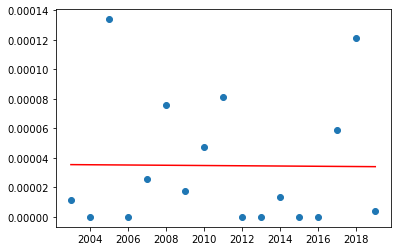

In [159]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([pers_care_emergency_2003_avg_hr_per_day, pers_care_emergency_2004_avg_hr_per_day, pers_care_emergency_2005_avg_hr_per_day, 
                                   pers_care_emergency_2006_avg_hr_per_day, pers_care_emergency_2007_avg_hr_per_day, pers_care_emergency_2008_avg_hr_per_day, 
                                   pers_care_emergency_2009_avg_hr_per_day, pers_care_emergency_2010_avg_hr_per_day, pers_care_emergency_2011_avg_hr_per_day, 
                                   pers_care_emergency_2012_avg_hr_per_day, pers_care_emergency_2013_avg_hr_per_day, pers_care_emergency_2014_avg_hr_per_day, 
                                   pers_care_emergency_2015_avg_hr_per_day, pers_care_emergency_2016_avg_hr_per_day, pers_care_emergency_2017_avg_hr_per_day, 
                                   pers_care_emergency_2018_avg_hr_per_day, pers_care_emergency_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [160]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

9.687990236328936e-05

In [161]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [pers_care_emergency_2003_avg_hr_per_day, pers_care_emergency_2004_avg_hr_per_day, pers_care_emergency_2005_avg_hr_per_day,
                          pers_care_emergency_2006_avg_hr_per_day, pers_care_emergency_2007_avg_hr_per_day, pers_care_emergency_2008_avg_hr_per_day, 
                          pers_care_emergency_2009_avg_hr_per_day, pers_care_emergency_2010_avg_hr_per_day, pers_care_emergency_2011_avg_hr_per_day, 
                          pers_care_emergency_2012_avg_hr_per_day, pers_care_emergency_2013_avg_hr_per_day, pers_care_emergency_2014_avg_hr_per_day, 
                          pers_care_emergency_2015_avg_hr_per_day, pers_care_emergency_2016_avg_hr_per_day, pers_care_emergency_2017_avg_hr_per_day, 
                          pers_care_emergency_2018_avg_hr_per_day, pers_care_emergency_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,0.000011
1,2004,0.000000
2,2005,0.000134
3,2006,0.000000
4,2007,0.000026
5,2008,0.000076
6,2009,0.000017
7,2010,0.000047
8,2011,0.000081
9,2012,0.000000


### Personal Care, n.e.c.* (0199)
019999 = Personal care, n.e.c.*

In [162]:
#0199 Personal Care , n.e.c.*
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e pers_care_nec, pers_care_nec 
#all pers_care_nec is assumed to be done at home 

#2003 Personal Care , n.e.c.*
pers_care_nec_2003 = atus_2003[atus_2003["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2003 = pers_care_nec_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2003_merge = pd.merge(nec_2003, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2003_merge["Multiplied Weight"] = nec_2003_merge["TUACTDUR24"] * nec_2003_merge["TUFNWGTP"]
nec_2003_weight = nec_2003_merge["Multiplied Weight"].sum()
pers_care_nec_2003_avg_hr_per_day = nec_2003_weight.sum() / all_2003_weight /60

# 2004 Personal Care , n.e.c.*
pers_care_nec_2004 = atus_2004[atus_2004["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2004 = pers_care_nec_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

nec_2004_merge = pd.merge(nec_2004, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
nec_2004_merge["Multiplied Weight"] = nec_2004_merge["TUACTDUR24"] * nec_2004_merge["TUFNWGTP"]
#nec_2004_merge

nec_2004_weight = nec_2004_merge["Multiplied Weight"].sum()
pers_care_nec_2004_avg_hr_per_day = nec_2004_weight.sum() / all_2004_weight /60
pers_care_nec_2004_avg_hr_per_day

# 2005 Personal Care , n.e.c.*
pers_care_nec_2005 = atus_2005[atus_2005["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2005 = pers_care_nec_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2005_merge = pd.merge(nec_2005, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2005_merge["Multiplied Weight"] = nec_2005_merge["TUACTDUR24"] * nec_2005_merge["TUFNWGTP"]
nec_2005_weight = nec_2005_merge["Multiplied Weight"].sum()
pers_care_nec_2005_avg_hr_per_day = nec_2005_weight.sum() / all_2005_weight /60

# 2006 Personal Care , n.e.c.*
pers_care_nec_2006 = atus_2006[atus_2006["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2006 = pers_care_nec_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2006_merge = pd.merge(nec_2006, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2006_merge["Multiplied Weight"] = nec_2006_merge["TUACTDUR24"] * nec_2006_merge["TUFNWGTP"]
nec_2006_weight = nec_2006_merge["Multiplied Weight"].sum()
pers_care_nec_2006_avg_hr_per_day = nec_2006_weight.sum() / all_2006_weight /60

# 2007 Personal Care , n.e.c.*
pers_care_nec_2007 = atus_2007[atus_2007["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2007 = pers_care_nec_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2007_merge = pd.merge(nec_2007, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2007_merge["Multiplied Weight"] = nec_2007_merge["TUACTDUR24"] * nec_2007_merge["TUFNWGTP"]
nec_2007_weight = nec_2007_merge["Multiplied Weight"].sum()
pers_care_nec_2007_avg_hr_per_day = nec_2007_weight.sum() / all_2007_weight /60

# 2008 Personal Care , n.e.c.*
pers_care_nec_2008 = atus_2008[atus_2008["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2008 = pers_care_nec_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2008_merge = pd.merge(nec_2008, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2008_merge["Multiplied Weight"] = nec_2008_merge["TUACTDUR24"] * nec_2008_merge["TUFNWGTP"]
nec_2008_weight = nec_2008_merge["Multiplied Weight"].sum()
pers_care_nec_2008_avg_hr_per_day = nec_2008_weight.sum() / all_2008_weight /60

# 2009 Personal Care , n.e.c.*
pers_care_nec_2009 = atus_2009[atus_2009["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2009 = pers_care_nec_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2009_merge = pd.merge(nec_2009, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2009_merge["Multiplied Weight"] = nec_2009_merge["TUACTDUR24"] * nec_2009_merge["TUFNWGTP"]
nec_2009_weight = nec_2009_merge["Multiplied Weight"].sum()
pers_care_nec_2009_avg_hr_per_day = nec_2009_weight.sum() / all_2009_weight /60

# 2010 Personal Care , n.e.c.*
pers_care_nec_2010 = atus_2010[atus_2010["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2010 = pers_care_nec_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2010_merge = pd.merge(nec_2010, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2010_merge["Multiplied Weight"] = nec_2010_merge["TUACTDUR24"] * nec_2010_merge["TUFNWGTP"]
nec_2010_weight = nec_2010_merge["Multiplied Weight"].sum()
pers_care_nec_2010_avg_hr_per_day = nec_2010_weight.sum() / all_2010_weight /60

# 2011 Personal Care , n.e.c.*
pers_care_nec_2011 = atus_2011[atus_2011["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2011 = pers_care_nec_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2011_merge = pd.merge(nec_2011, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2011_merge["Multiplied Weight"] = nec_2011_merge["TUACTDUR24"] * nec_2011_merge["TUFNWGTP"]
nec_2011_weight = nec_2011_merge["Multiplied Weight"].sum()
pers_care_nec_2011_avg_hr_per_day = nec_2011_weight.sum() / all_2011_weight /60

# 2012 Personal Care , n.e.c.*
pers_care_nec_2012 = atus_2012[atus_2012["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2012 = pers_care_nec_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2012_merge = pd.merge(nec_2012, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2012_merge["Multiplied Weight"] = nec_2012_merge["TUACTDUR24"] * nec_2012_merge["TUFNWGTP"]
nec_2012_weight = nec_2012_merge["Multiplied Weight"].sum()
pers_care_nec_2012_avg_hr_per_day = nec_2012_weight.sum() / all_2012_weight /60

# 2013 Personal Care , n.e.c.*
pers_care_nec_2013 = atus_2013[atus_2013["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2013 = pers_care_nec_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2013_merge = pd.merge(nec_2013, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2013_merge["Multiplied Weight"] = nec_2013_merge["TUACTDUR24"] * nec_2013_merge["TUFNWGTP"]
nec_2013_weight = nec_2013_merge["Multiplied Weight"].sum()
pers_care_nec_2013_avg_hr_per_day = nec_2013_weight.sum() / all_2013_weight /60

# 2014 Personal Care , n.e.c.*
pers_care_nec_2014 = atus_2014[atus_2014["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2014 = pers_care_nec_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2014_merge = pd.merge(nec_2014, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2014_merge["Multiplied Weight"] = nec_2014_merge["TUACTDUR24"] * nec_2014_merge["TUFNWGTP"]
nec_2014_weight = nec_2014_merge["Multiplied Weight"].sum()
pers_care_nec_2014_avg_hr_per_day = nec_2014_weight.sum() / all_2014_weight /60

# 2015 Personal Care , n.e.c.*
pers_care_nec_2015 = atus_2015[atus_2015["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2015 = pers_care_nec_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2015_merge = pd.merge(nec_2015, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2015_merge["Multiplied Weight"] = nec_2015_merge["TUACTDUR24"] * nec_2015_merge["TUFNWGTP"]
nec_2015_weight = nec_2015_merge["Multiplied Weight"].sum()
pers_care_nec_2015_avg_hr_per_day = nec_2015_weight.sum() / all_2015_weight /60

# 2016 Personal Care , n.e.c.*
pers_care_nec_2016 = atus_2016[atus_2016["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2016 = pers_care_nec_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2016_merge = pd.merge(nec_2016, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2016_merge["Multiplied Weight"] = nec_2016_merge["TUACTDUR24"] * nec_2016_merge["TUFNWGTP"]
nec_2016_weight = nec_2016_merge["Multiplied Weight"].sum()
pers_care_nec_2016_avg_hr_per_day = nec_2016_weight.sum() / all_2016_weight /60

# 2017 Personal Care , n.e.c.*
pers_care_nec_2017 = atus_2017[atus_2017["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2017 = pers_care_nec_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2017_merge = pd.merge(nec_2017, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2017_merge["Multiplied Weight"] = nec_2017_merge["TUACTDUR24"] * nec_2017_merge["TUFNWGTP"]
nec_2017_weight = nec_2017_merge["Multiplied Weight"].sum()
pers_care_nec_2017_avg_hr_per_day = nec_2017_weight.sum() / all_2017_weight /60

# 2018 Personal Care , n.e.c.*
pers_care_nec_2018 = atus_2018[atus_2018["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2018 = pers_care_nec_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2018_merge = pd.merge(nec_2018, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2018_merge["Multiplied Weight"] = nec_2018_merge["TUACTDUR24"] * nec_2018_merge["TUFNWGTP"]
nec_2018_weight = nec_2018_merge["Multiplied Weight"].sum()
pers_care_nec_2018_avg_hr_per_day = nec_2018_weight.sum() / all_2018_weight /60

# 2019 Personal Care , n.e.c.*
pers_care_nec_2019 = atus_2019[atus_2019["TRTIER2P"].apply(str).str.startswith("0199")]
nec_2019 = pers_care_nec_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
nec_2019_merge = pd.merge(nec_2019, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])

nec_2019_merge["Multiplied Weight"] = nec_2019_merge["TUACTDUR24"] * nec_2019_merge["TUFNWGTP"]
nec_2019_weight = nec_2019_merge["Multiplied Weight"].sum()
pers_care_nec_2019_avg_hr_per_day = nec_2019_weight.sum() / all_2019_weight /60

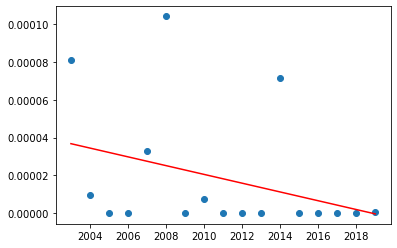

In [163]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([pers_care_nec_2003_avg_hr_per_day, pers_care_nec_2004_avg_hr_per_day, pers_care_nec_2005_avg_hr_per_day, 
                                   pers_care_nec_2006_avg_hr_per_day, pers_care_nec_2007_avg_hr_per_day, pers_care_nec_2008_avg_hr_per_day, 
                                   pers_care_nec_2009_avg_hr_per_day, pers_care_nec_2010_avg_hr_per_day, pers_care_nec_2011_avg_hr_per_day, 
                                   pers_care_nec_2012_avg_hr_per_day, pers_care_nec_2013_avg_hr_per_day, pers_care_nec_2014_avg_hr_per_day, 
                                   pers_care_nec_2015_avg_hr_per_day, pers_care_nec_2016_avg_hr_per_day, pers_care_nec_2017_avg_hr_per_day, 
                                   pers_care_nec_2018_avg_hr_per_day, pers_care_nec_2019_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365/365 for i in activity_hours_per_day]
#activity_hours_per_yr

x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [164]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.12122927955955498

In [165]:
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
activity_hours_per_day = [pers_care_nec_2003_avg_hr_per_day, pers_care_nec_2004_avg_hr_per_day, pers_care_nec_2005_avg_hr_per_day,
                          pers_care_nec_2006_avg_hr_per_day, pers_care_nec_2007_avg_hr_per_day, pers_care_nec_2008_avg_hr_per_day, 
                          pers_care_nec_2009_avg_hr_per_day, pers_care_nec_2010_avg_hr_per_day, pers_care_nec_2011_avg_hr_per_day, 
                          pers_care_nec_2012_avg_hr_per_day, pers_care_nec_2013_avg_hr_per_day, pers_care_nec_2014_avg_hr_per_day, 
                          pers_care_nec_2015_avg_hr_per_day, pers_care_nec_2016_avg_hr_per_day, pers_care_nec_2017_avg_hr_per_day, 
                          pers_care_nec_2018_avg_hr_per_day, pers_care_nec_2019_avg_hr_per_day]
dictionary = {"Year":year,
                  "HPD":activity_hours_per_day}

df = pd.DataFrame(dictionary)
df

,Year,HPD
0,2003,8.118710e-05
1,2004,9.609995e-06
2,2005,0.000000e+00
3,2006,0.000000e+00
4,2007,3.290500e-05
5,2008,1.043732e-04
6,2009,0.000000e+00
7,2010,7.625293e-06
8,2011,0.000000e+00
9,2012,0.000000e+00
